## Loan Prediction

The goal is to determine what applicants qualify for a loan.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df_train = pd.read_csv("data/train_ctrUa4K.csv")
df_test = pd.read_csv("data/test_lAUu6dG.csv")

print("Training Dataset")
df_train.head(10)

Training Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
print("Testing Dataset")
df_test.head(10)

Testing Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


### Feature Descriptions

* Loan_ID           - Unique Loan ID
* Gender            - Male/ Female
* Married           - Applicant married (Y/N)
* Dependents        - # of dependents
* Education         - Applicant Education (Graduate / Under Graduate)
* Self_Employed     - Self employed (Y/N)
* ApplicantIncome   - Applicant income
* CoApplicantIncome - CoApplicant income
* LoanAmount        - Loan amount in thousands
* Loan_Amount_Term  - Term of loan in months
* Credit_History    - credit history meets guidelines (1/0)
* Property_Area     - Urban / Semi Urban / Rural
* Loan_Status       - Loan Approved (Y/N)




In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* LoanAmount is missing 22 values
* Loan_Amount_term is missing 14 values
* Credit_History is missing 50 values

In [6]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### Distribution Analysis

Now we look at the distribution of ApplicantIncome and LoanAmount

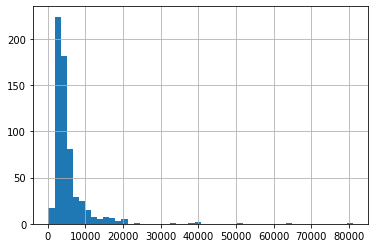

In [8]:
df_train['ApplicantIncome'].hist(bins=50)

There are extreme values between 0 and 10k. Just to confirm we will check it again with a box and whisker plot.

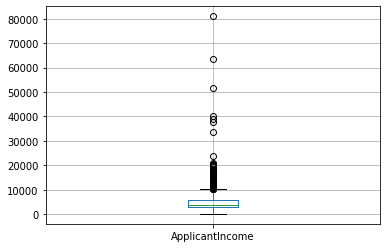

In [9]:
df_train.boxplot(column='ApplicantIncome')

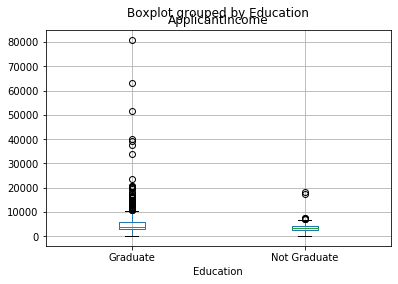

In [12]:
df_train.boxplot(column='ApplicantIncome', by='Education')

Now lets look at a histogram and box and whisker plot of LoanAmount.

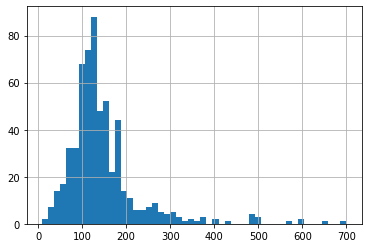

In [13]:
df_train['LoanAmount'].hist(bins=50)

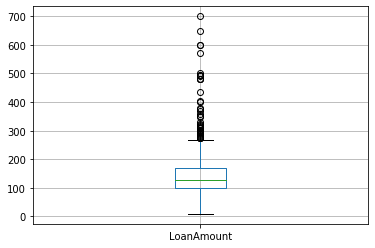

In [14]:
df_train.boxplot(column='LoanAmount')

There are also some extreme values in LoanAmount. This mean we will need to employ some other techniques also known as data munging to improve the quality of data.